# Exploring Stochastic Models

In [ ]:
#hide
#skip
! [ -e /content ] && pip install -Uqq pyndamics3 emcee # upgrade pyndamics3 on colab

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from pyndamics3 import Simulation,Stochastic_Simulation

pyndamics3  version  0.0.20


## Stochastic SIR Model

100%|██████████| 100/100 [00:01<00:00, 77.78it/s]


@numba.jit
def _propensity_function(population, args):
    S,I,R = population
    β,γ = args
    
    N=S+I+R
    
    val = np.array([
        β*S*I/N,
        γ*I,
    ])
    return val


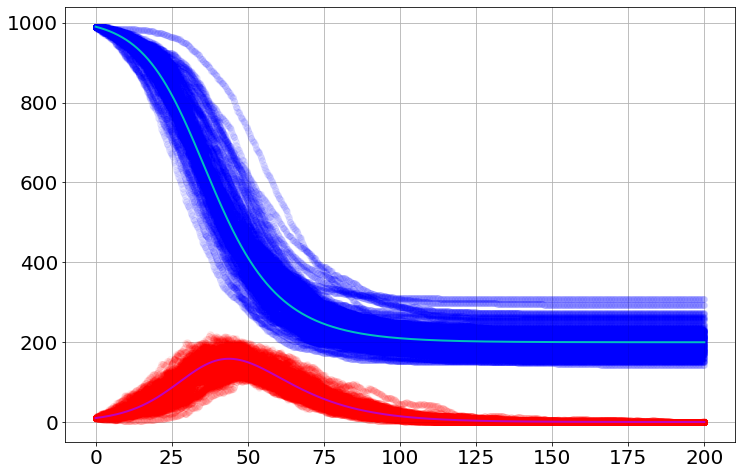

In [ ]:
β=0.2
γ=0.1
So=990
Io=10

dynamic_sim=sim=Simulation()
sim.add("N=S+I+R")
sim.add("S'=-β*S*I/N",So)
sim.add("I'=+β*S*I/N-γ*I",Io)
sim.add("R'=+γ*I",0)
sim.params(β=β,γ=γ)
sim.run(200)


stoch_sim=sim=Stochastic_Simulation()
sim.add("-S+I",'β*S*I/N',S=So,I=Io)
sim.add("-I +R",'γ*I',R=0)
sim.add("N=S+I+R")
sim.params(β=β,γ=γ)
sim.run(200,Nsims=100)

for i in range(100):
    
    plot(sim.t,sim.S[i],'bo',alpha=0.05)
    plot(sim.t,sim.I[i],'ro',alpha=0.05)

plot(dynamic_sim.t,dynamic_sim.S,'c-')
plot(dynamic_sim.t,dynamic_sim.I,'m-')

print(sim.func_str)

In [ ]:
flut = array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
flui = array([3,8,26,76,225,298,258,233,189,128,68,29,14,4])

In [ ]:
from pyndamics3.mcmc import *

In [ ]:
β=1.9
γ=0.5
So=763
Io=1

dynamic_sim=sim=Simulation()
sim.add("N=S+I+R")
sim.add("S'=-β*S*I/N",So)
sim.add("I'=+β*S*I/N-γ*I",Io)
sim.add("R'=+γ*I",0)
sim.params(β=β,γ=γ)
sim.add_data(t=flut,I=flui)
sim.run(20)

In [ ]:
model=MCMCModel(sim,β=Uniform(0,5),
               γ=Uniform(0,5))

Sampling Prior...
Done.
0.34 s
Running MCMC 1/3...
Done.
9.73 s
Running MCMC 2/3...
Done.
13.97 s
Running MCMC 3/3...
Done.
15.41 s


<Figure size 864x576 with 0 Axes>

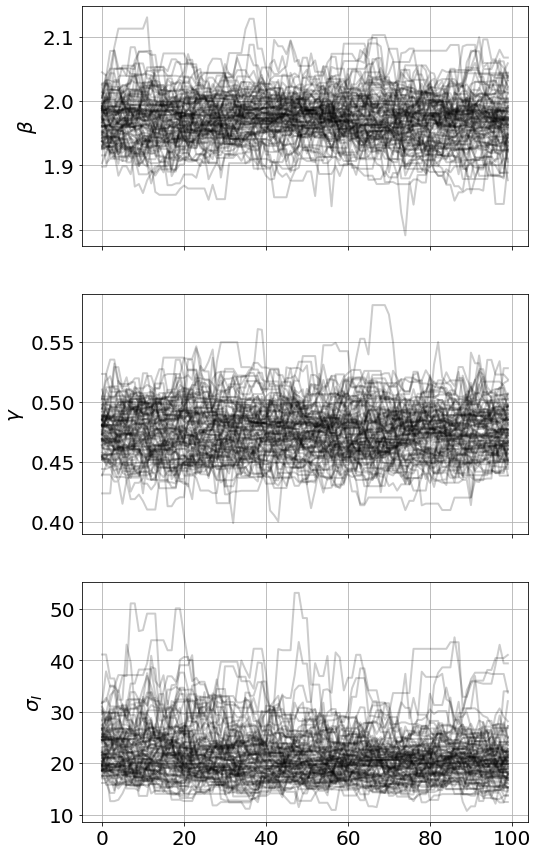

In [ ]:
number_of_iterations=100
model.run_mcmc(number_of_iterations,repeat=3)
model.plot_chains()

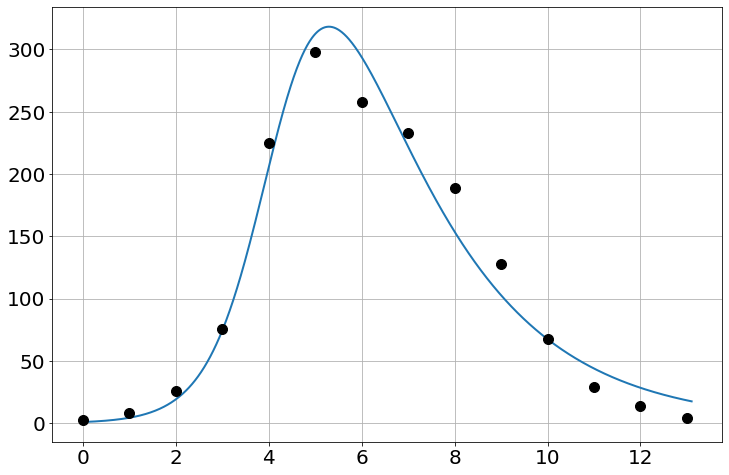

In [ ]:
plot(sim.t,sim.I)
plot(flut,flui,'ko',ms=10,lw=3,)

In [ ]:
sim.β,sim.γ

(1.9732213241997467, 0.47521873806558335)

In [ ]:
stoch_sim=Stochastic_Simulation()
stoch_sim.add("-S+I",'β*S*I/N',S=So,I=Io)
stoch_sim.add("-I +R",'γ*I',R=0)
stoch_sim.add("N=S+I+R")
stoch_sim.params(β=1.9732213241997467,γ=1.9732213241997467)
stoch_sim.add_data(t=flut,I=flui)
stoch_sim.run(20,Nsims=100)

AttributeError: 'Stochastic_Simulation' object has no attribute 'add_data'

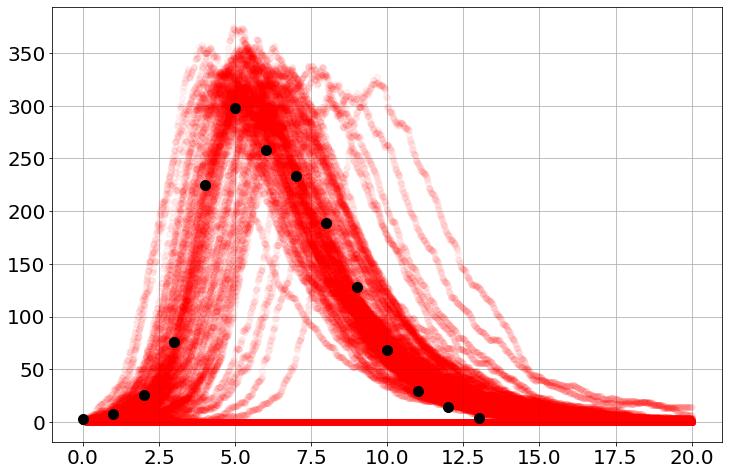

In [ ]:
for i in range(100):    
    plot(stoch_sim.t,stoch_sim.I[i],'ro',alpha=0.05)
    
plot(flut,flui,'ko',ms=10,lw=3,)    

In [ ]:
stoch_model=MCMCModel(stoch_sim,β=Uniform(0,5),
               γ=Uniform(0,5))

AttributeError: 'str' object has no attribute 'data'